In [3]:
import os
import pickle
from collections import Counter

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data_dir = "./synopsys_df.pkl"
df = pd.read_pickle(data_dir)
corpus = " ".join(df.synopsis.to_list())

In [8]:
word_frequency = Counter(corpus.lower().split())

In [9]:
stop_words = set(stopwords.words('english')) 

In [21]:
subject_specific_stop_words = []
for word, count in word_frequency.most_common(120):
    if word not in stop_words:
        subject_specific_stop_words.append(word)

In [22]:
print(subject_specific_stop_words)

['(source:', 'one', 'mal', '[written', 'rewrite]', 'new', 'however,', 'school', 'world', 'ann)', 'two', 'life', 'high', 'girl', 'young', 'must', 'find', 'first', 'also', 'become', 'mysterious', 'story', 'time', 'years', 'named', 'friends', 'known', 'even', 'student', 'help', 'take', 'love', 'called', 'make', 'order', 'episode', 'finds', 'three', 'day', 'special', 'back', 'get', 'soon', 'girls', 'many', 'way', 'group', 'people', 'around', 'series']


In [27]:
with open("./custom_stop_words.txt", "w", encoding="utf-8") as f:
    for word in subject_specific_stop_words:
        f.write(str(word + '\n'))

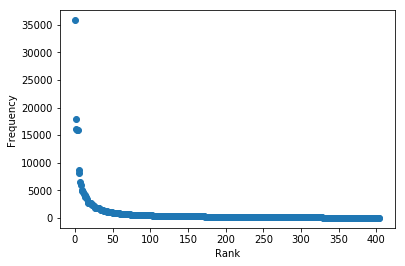

In [18]:
word_frequency_list = sorted(set([x[1] for x in word_frequency.items() if x[1] not in stop_words]), reverse=True)
ranking = [x[0] for x in enumerate(word_frequency_list)]
axes = plt.gca()
plt.scatter(x=ranking, y=word_frequency_list)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()